In [118]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%matplotlib inline 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets

In [119]:
def GradientDescent(Amat, y, winit, rate, num_iter, regularization_param = 0):
    n, p = Amat.shape
    w_history = []
    loss_history = []
    w = winit
    
    for i in range(num_iter):
        loss = np.square(y - Amat.dot(w)).mean()
        w_history.append(w)
        loss_history.append(loss)
        grad = (-2/n)*Amat.T.dot(y - Amat.dot(w)) + regularization_param * w
        w = w - rate * grad
        
    return w, np.asarray(w_history), np.asarray(loss_history)

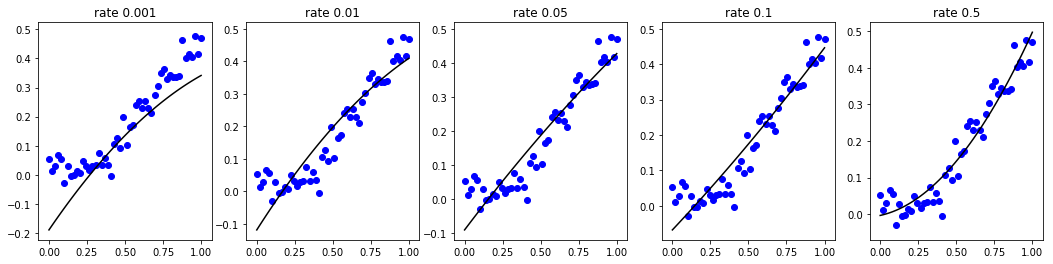

In [120]:
# create small training data set ##########################
def f(x):
    return 0.5*(x)*(x**4)/(.05+(x**4))

ntrain=50

np.random.seed(0)
X=np.linspace(0,1,ntrain)
Xsq=np.square(X)

Xsq

y0=f(X)+0.03*np.random.normal(0,1,ntrain)

y0

Aquad=np.stack((np.ones(ntrain),X,Xsq)).T

ntest = 50

Xtest=np.linspace(0,1,ntest)

n, p = Aquad.shape

w0 = np.random.randn(p)

weights = []

rates = [.001,.01,.05,.1,.5]

for i, r in enumerate(rates):
    weights.append(GradientDescent(Aquad, y0,  w0, r, 1000)[0])
    
fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')
for d in range(5):
    ax[d].scatter(X,y0, c='b')
    ax[d].plot(X, weights[d][0] + weights[d][1]*X + weights[d][2]*X**2, c='k')
    title = 'rate '+str(rates[d])
    ax[d].set_title(title)


[array([ 0.00344654,  0.05214439,  0.44687108])]


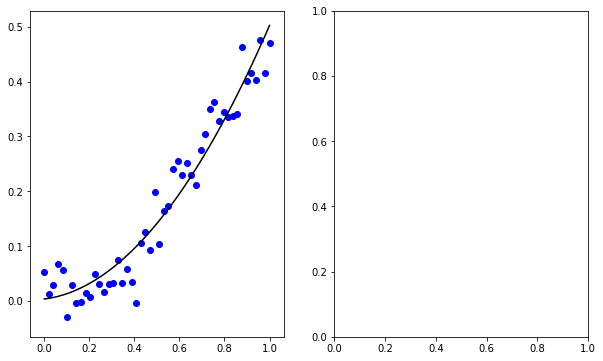

In [121]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0, solver="cholesky", fit_intercept=False)
ridge_reg.fit(Aquad, y0)

weights = [ridge_reg.coef_]

print(weights)


fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=2,sharex='col')

d = 0
ax[0].scatter(X,y0, c='b')
ax[0].plot(X, weights[d][0] + weights[d][1]*X + weights[d][2]*X**2, c='k')
title = 'rate '+str(rates[d])


Try to fit a higher degree model with alpha = 0

### Coursework

### Generating the data

In [122]:
np.random.normal(0, 0.2, size=100).shape

(100,)

(100,)


Text(0, 0.5, 'y')

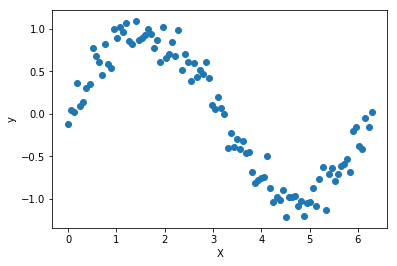

In [123]:
def f(x):
    return np.sin(x)

min_x = 0
num_points = 100
max_x = 2*np.pi

X = np.linspace(min_x, max_x, num_points)

print (X.shape)

y = f(X) + np.random.normal(0, 0.15, size=num_points)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")

### Fitting a model of degree = 2

Creating Design matrix

In [124]:
Xsq = np.square(X)
A = np.stack((np.ones(num_points), X, Xsq)).T


Minimizing loss by Gradient descent

(3,)
[array([ 0.06179441,  0.06530051, -0.0357336 ]), array([ 0.06709673,  0.06103204, -0.03510984]), array([ 0.07220257,  0.05705872, -0.03453638]), array([ 0.07503883,  0.05495058, -0.03423749]), array([ 0.07506198,  0.05497327, -0.03406485])]


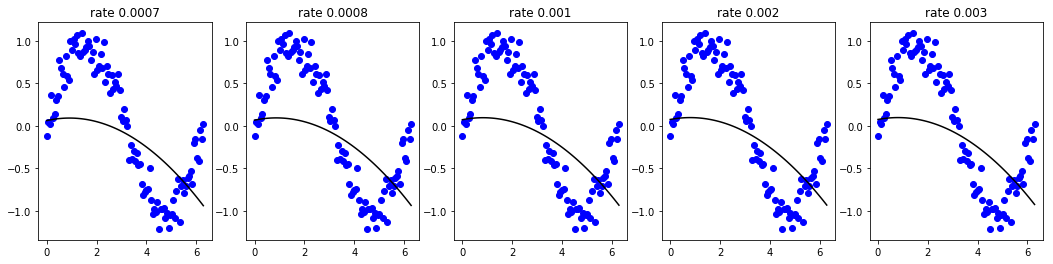

In [125]:
n, p = A.shape

w0 = np.random.randn(p)

print(w0.shape)



weights = []

rates = [.0007, .0008, .001, .002, .003]

for i, r in enumerate(rates):
    weights.append(GradientDescent(A, y,  w0, r, 1000, 5)[0])
    
    
print (weights)
fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')
for d in range(5):
    ax[d].scatter(X,y, c='b')
    ax[d].plot(X, weights[d][0] + weights[d][1]*X + weights[d][2]*X**2, c='k')
    title = 'rate '+str(rates[d])
    ax[d].set_title(title)

    

#### Results

- Above were results of Ridge Regression with GradientDescent

- It can be seen that when lambda = 0; there is no difference from normal gradient descent

- If lambda increases a lot (lambda = 1000) there is underfitting, all the weights are very less and the line looks like a st line

### RIdge Regression in closed form (deg = 2)

[array([ 0.00075006, -0.00126106, -0.01242364])]


Text(0, 0.5, 'y')

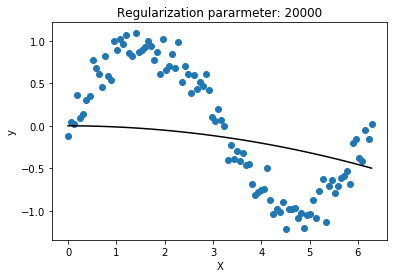

In [126]:
ridge_reg = Ridge(alpha=20000, solver="cholesky", fit_intercept=False)
ridge_reg.fit(A, y)

weights = [ridge_reg.coef_]

print(weights)


plt.scatter(X, y)

plt.plot(X, weights[0][0] + weights[0][1]*X + weights[0][2]*X**2, color = "k")
plt.title("Regularization pararmeter: 20000")
plt.xlabel("X")
plt.ylabel("y")

### RIdge Regression in closed form (deg = 3)

In [127]:
X = X.reshape(num_points, 1)

[array([ 0.02134286,  0.01596806, -0.01083574, -0.00254055])]


Text(0, 0.5, 'y')

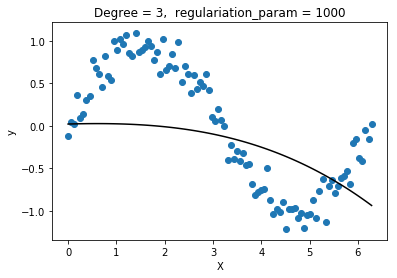

In [128]:
from sklearn.preprocessing import PolynomialFeatures



features = PolynomialFeatures(degree = 3, include_bias = True)

X_feature = features.fit_transform(X)

# X_feature is the design matrix

regress = Ridge(alpha = 1000, solver="cholesky", fit_intercept=False)

regress.fit(X_feature, y)


weights = [regress.coef_]
print(weights)

y_predicted = regress.predict(X_feature)

plt.scatter(X, y)

plt.plot(X, y_predicted, color = "k")

plt.title("Degree = 3,  regulariation_param = 1000")
plt.xlabel("X")
plt.ylabel("y")



#### Cross Verification: with eqn given

w = (XTX + λIp+1)-1XTy;

In [129]:
XTX = X_feature.T.dot(X_feature)

I = np.identity(4)
alpha = 1000

alpha_I = alpha * I

lhs = XTX + alpha_I

lhs = np.linalg.inv(lhs)

lhs.dot(X_feature.T.dot(y.reshape(100, 1)))

array([[ 0.02134286],
       [ 0.01596806],
       [-0.01083574],
       [-0.00254055]])

Solving for the eqn in closed  form for degree == 3 and lambda = 10, we get weights as:

[array([ 0.4050188 ,  0.57908608, -0.35818853,  0.03919433])]


We verify this with the eqn of w

And **we get the same wts**!!

Also include derivation from copy


#### Next Question

Splitting the data into train and test (67 and 33)

In [130]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 40)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(67, 1) (33, 1) (67,) (33,)


Keeping alpha constant, changing the rates

For degree: 1
(100, 2)
[ 0.52496662 -0.17774323] 0.0
Error: 0.331370619191
For degree: 2
(100, 3)
[ 0.39326378  0.01628651 -0.03409749] 0.0
Error: 0.312411296779
For degree: 3
(100, 4)
[ 0.38743176  0.44982553 -0.28725506  0.03136968] 0.0
Error: 0.14718270176
For degree: 4
(100, 5)
[ 0.25510936  0.30538714  0.14804584 -0.1348478   0.01650459] 0.0
Error: 0.0447834439826
For degree: 5
(100, 6)
[ 0.2497413   0.32081365  0.18359122 -0.17041056  0.02590441 -0.00075482] 0.0
Error: 0.0412497102419


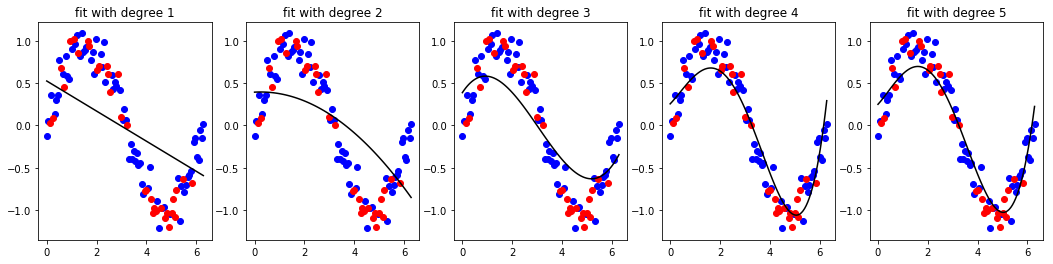

In [131]:
fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')
mean_sq_errors = []
for d in range(5):
    features = PolynomialFeatures(degree = d+1, include_bias = True)
    
    X_feature = features.fit_transform(X)
   
    X_feature_train =  features.fit_transform(X_train)
    X_feature_test =  features.fit_transform(X_test)
    
    regress = Ridge(alpha=10, solver="cholesky", fit_intercept=False)
    
    regress.fit(X_feature_train, y_train)
    print ("For degree:", d+1)
    print(X_feature.shape)
    print (regress.coef_, regress.intercept_)
                
    y_predict=regress.predict(X_feature_test)
                              
    y_model = regress.predict(X_feature)
                              
    ax[d].scatter(X_train,y_train, c='b')
    ax[d].scatter(X_test, y_test, c='r')
    
    
    mean_sq_error = mean_squared_error(y_test, y_predict)
    mean_sq_errors.append([d+1, mean_sq_error])
    print ("Error:", mean_sq_error)
    
    ax[d].plot(X, y_model, c='k')
    title = 'fit with degree '+str(d+1)
    ax[d].set_title(title)



Plotting mean rss as a function of degree with alpha = 10

Text(0, 0.5, 'MSE')

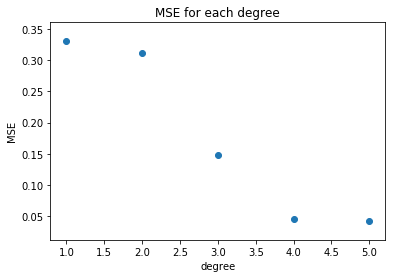

In [132]:
mean_sq_errors = np.array(mean_sq_errors)

plt.scatter(mean_sq_errors[:, 0], mean_sq_errors[:, 1])

plt.title("MSE for each degree")
plt.xlabel("degree")
plt.ylabel("MSE")

Now lets look at MSE for degree = 5 but with alpha = 10, 20, 50, 100, 500

For alpha value: 0
[ -1.53329048e-01   1.73272585e+00  -7.78423010e-01   7.41651483e-02
   1.11257260e-03] 0.0
Error: 0.0206863816237
For alpha value: 0.5
[ 0.13339961  0.94438287 -0.27199195 -0.04194067  0.00982868] 0.0
Error: 0.0270283995788
For alpha value: 1
[ 0.21241305  0.70690495 -0.11727803 -0.07749173  0.01249574] 0.0
Error: 0.0307999877806
For alpha value: 5
[ 0.27622454  0.37336673  0.10711128 -0.12821303  0.01620961] 0.0
Error: 0.0392888841584
For alpha value: 10
[ 0.25510936  0.30538714  0.14804584 -0.1348478   0.01650459] 0.0
Error: 0.0447834439826


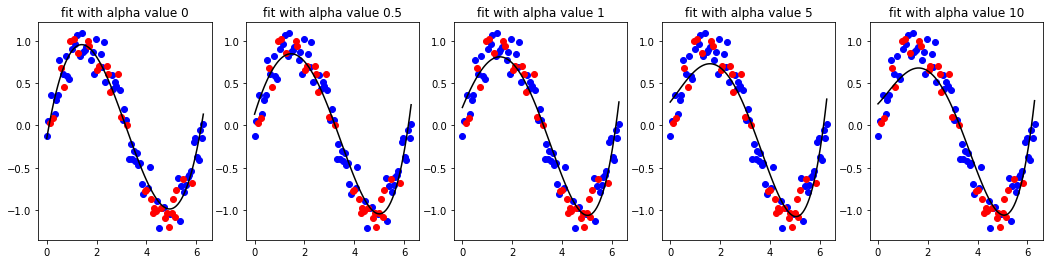

In [133]:
alpha_values = [0, 0.5, 1, 5, 10]


features = PolynomialFeatures(degree = 4, include_bias = True)   
X_feature = features.fit_transform(X)
X_feature_train =  features.fit_transform(X_train)
X_feature_test =  features.fit_transform(X_test)
    

fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')
mean_sq_errors = []
for d in range(len(alpha_values)):
    
    regress = Ridge(alpha=alpha_values[d], solver="cholesky", fit_intercept=False)
    
    regress.fit(X_feature_train, y_train)
    print ("For alpha value:", alpha_values[d])
    print (regress.coef_, regress.intercept_)
                
    y_predict=regress.predict(X_feature_test)
                              
    y_model = regress.predict(X_feature)
                              
    ax[d].scatter(X_train,y_train, c='b')
    ax[d].scatter(X_test, y_test, c='r')
    
    
    mean_sq_error = mean_squared_error(y_test, y_predict)
    mean_sq_errors.append([alpha_values[d], mean_sq_error])
    print ("Error:", mean_sq_error)
    
    ax[d].plot(X, y_model, c='k')
    title = 'fit with alpha value '+str(alpha_values[d])
    ax[d].set_title(title)



In [134]:
mean_sq_errors

[[0, 0.020686381623738603],
 [0.5, 0.027028399578755413],
 [1, 0.0307999877806404],
 [5, 0.039288884158417796],
 [10, 0.044783443982569587]]

Text(0, 0.5, 'MSE')

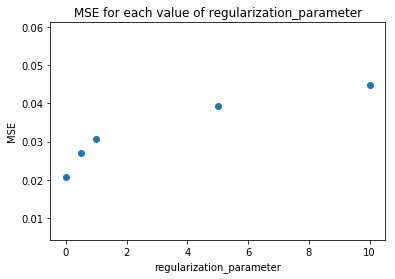

In [135]:
mean_sq_errors = np.array(mean_sq_errors)

plt.scatter(mean_sq_errors[:, 0], mean_sq_errors[:, 1])

plt.title("MSE for each value of regularization_parameter")
plt.xlabel("regularization_parameter")
plt.ylabel("MSE")

### How does linear regression generalise?

In [136]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

splitted_X = kfold.split(X)
splitted_y = kfold.split(y)

mean_sq_errors = []

for train, test in splitted_X:
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    print (X_train.shape)

(90, 1)
(90, 1)
(90, 1)
(90, 1)
(90, 1)
(90, 1)
(90, 1)
(90, 1)
(90, 1)
(90, 1)


In [139]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

splitted_X = kfold.split(X)
splitted_y = kfold.split(y)

mean_sq_errors = []

weights = []

for train, test in splitted_X:
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]

    
    # create model each time, compute error and store it
    
    
    features = PolynomialFeatures(degree = 4, include_bias = True)
    
    X_feature = features.fit_transform(X)
    X_feature_train =  features.fit_transform(X_train)
    X_feature_test =  features.fit_transform(X_test)
    
    regress = Ridge(alpha=0.5, solver="cholesky", fit_intercept=False)
    
    regress.fit(X_feature_train, y_train)
    weights.append(regress.coef_)
                
    y_predict=regress.predict(X_feature_test)
    

                                
    mean_sq_error = mean_squared_error(y_test, y_predict)
    mean_sq_errors.append([mean_sq_error])
    print ("Error:", mean_sq_error)
    

Error: 0.0457485857496
Error: 0.0241516199687
Error: 0.0246356821558
Error: 0.0302528073777
Error: 0.0592800922
Error: 0.0126760279652
Error: 0.0260538400309
Error: 0.038616626129
Error: 0.0163831709108
Error: 0.0132792489385


In [138]:
np.mean(np.array(mean_sq_errors)[:,0])

0.029107770142615164

For same degree 4 without cross validation we god MSE of 0.03 earlier which was less, but this is a generalized value. It gives average of all models. 

In [144]:
np.mean(weights, axis=0)

array([ 0.08816027,  1.04556785, -0.32059707, -0.0346012 ,  0.00953376])